# Para el ejercicio se busca realizar las siguientes tareas:

##Integrantes:
Christian Zhirzhan, Evelyn Pintado

1.   Visualizar los datos registrados en la pandemia del Covid-19
2.   Desarrollar preprocesamiento y aplicar aprendizaje no supervisado por clustering.

Para esto se utiliza el dataset "master_dataset.csv" disponible en este <a href="https://www.covid19survivalcalculator.com/download">enlace</a>


##Librerias

In [ ]:
#importamos las librerias necesarias
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from plotly.subplots import make_subplots
from folium import plugins
from tqdm.notebook import tqdm as tqdm

import math, time 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
import random
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline
import statsmodels as sm
import folium as fl
import plotly.offline as py
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import folium 

import warnings
warnings.filterwarnings('ignore')

print('####IMPORTADAS####')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



####IMPORTADAS####


##Carga de datos

In [ ]:
df = pd.read_csv('master_dataset.csv')
df.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
2020-03-24,NaN,CA,43.6023,-79.3058,100.0,male,20_30,178,88,27.7,bn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-25,NaN,CA,51.0263,-114.0862,5.0,female,30_40,158,54,21.6,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-25,NaN,CA,43.1642,-79.8471,100.0,male,90_100,184,94,27.7,an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,NaN,NaN,NaN,12.0,14.701,NaN
2020-03-25,NaN,CA,45.6605,-73.6724,5.0,male,60_70,172,96,32.4,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,NaN,NaN,NaN,6.0,2.250,NaN
2020-03-25,NaN,CA,49.2525,-122.9481,1.0,male,30_40,166,70,25.4,abp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN


##Preprocesamiento

Se eligen las columnas mas importantes del dataset y se aplica limpieza de los datos vacios(NaN), luego estos datos se guardan en un archivo cvs.

In [ ]:

#df[['blood_type', 'insurance'	,'income',	'race',	'immigrant',	'smoking',	'alcohol',	'cannabis',	'amphetamines'	,'cocaine',	'lsd'	,'mdma'	]] = df[['blood_type', 'insurance'	,'income',	'race',	'immigrant',	'smoking',	'alcohol',	'cannabis',	'amphetamines'	,'cocaine',	'lsd',	'mdma'	]].fillna('')
dfreducido = df[['ip_accuracy','sex','covid19_positive']]

dfreducido = dfreducido.dropna()
dfreducido = dfreducido.rename(columns={'ip_accuracy':'sexo',
                                   'sex':'edad'})


dfreducido.to_csv(r'procesado1.csv', header=True)

p = pd.read_csv('procesado1.csv')
p.head()

,Unnamed: 0,sexo,edad,covid19_positive
0,2020-03-24,male,20_30,0
1,2020-03-25,female,30_40,0
2,2020-03-25,male,90_100,0
3,2020-03-25,male,60_70,0
4,2020-03-25,male,30_40,0


Dedibo a que en la columna de la edad los datos vienen dados por intervalos estos se deben clasificar en valores numericos reales. para esto se clasificaron en numero del 1 al 10.
- 0_10 = 1
- 10_20 = 2
- 20_30 = 3
- 30_40 = 4
- 40_50 = 5
- 50_60 = 6
- 60_70 = 7
- 70_80 = 8
- 80_90 = 9
- 90_100 = 10
- 100_110 = 11

In [ ]:
#dfreducido = dfreducido.drop(dfreducido[dfreducido['sexo']=='other'].index)
dfp = pd.read_csv('procesado2.csv')
dfp.head()

,Unnamed: 0,sexo,edad,covid19_positive
0,2020-03-24,male,3,0
1,2020-03-25,female,4,0
2,2020-03-25,male,9,0
3,2020-03-25,male,7,0
4,2020-03-25,male,4,0


In [ ]:
#Debido a que la columna de sexo del dataset  tienen etiquetas 'male' y 'female', estas se les tiene que transformar
#a 0 y 1 para realizar el entrenamiento.
#Las etiquetas quedan coformadas de la siguiente manera:
#male: 1
#female: 0


from sklearn import preprocessing
input_labels = ['male', 'female']

# Create label encoder and fit the labels
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

print("\sexo:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)

listResult=[]
for i,r in dfp.iterrows():
        listResult.append(r['sexo'].strip())

encoder = encoder.transform(listResult)
dfp['sexo'] = list(encoder)
y = dfp.sexo.values
print(y)

\sexo:
female --> 0
male --> 1
[1 0 1 ... 1 1 0]


In [ ]:
dfp

,Unnamed: 0,sexo,edad,covid19_positive
0,2020-03-24,1,3,0
1,2020-03-25,0,4,0
2,2020-03-25,1,9,0
3,2020-03-25,1,7,0
4,2020-03-25,1,4,0
...,...,...,...,...
817579,2020-07-07,0,8,0
817580,2020-07-07,1,8,0
817581,2020-07-08,1,8,0
817582,2020-07-06,1,6,0


In [ ]:
dfp.to_csv(r'preprocesado.csv', index = False)

In [ ]:
print('Cantidad de Filas y columnas:',dfp.shape)
print('Nombre columnas:',dfp.columns)
print('Cantidad de Filas y columnas:',dfp.shape)
print('Nombre columnas:',dfp.columns)

Cantidad de Filas y columnas: (817584, 4)
Nombre columnas: Index(['Unnamed: 0', 'sexo', 'edad', 'covid19_positive'], dtype='object')
Cantidad de Filas y columnas: (817584, 4)
Nombre columnas: Index(['Unnamed: 0', 'sexo', 'edad', 'covid19_positive'], dtype='object')


In [ ]:
print('Columnas, nulos y tipo de datos')
dfp.info()

Columnas, nulos y tipo de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817584 entries, 0 to 817583
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        817584 non-null  object
 1   sexo              817584 non-null  int64 
 2   edad              817584 non-null  int64 
 3   covid19_positive  817584 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 25.0+ MB


##Correlacion

In [ ]:
import statsmodels.api as sm
correl=dfp.corr()
correl=round(correl,5)
correl

,sexo,edad,covid19_positive
sexo,1.00000,0.05567,-0.01084
edad,0.05567,1.00000,-0.02821
covid19_positive,-0.01084,-0.02821,1.00000


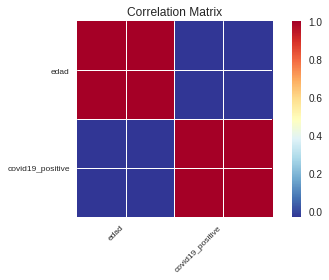

In [ ]:
import statsmodels.api as sm
corr = dfp.set_index('sexo').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
import math
from sklearn.preprocessing import StandardScaler
x=dfp[['sexo' ,'edad' ,'covid19_positive']]
x = StandardScaler().fit_transform(x)
print(x)
print("Se han estandarizado los datos")

[[ 1.4169462  -1.03082746 -0.12960277]
 [-0.7057431  -0.31292318 -0.12960277]
 [ 1.4169462   3.27659821 -0.12960277]
 ...
 [ 1.4169462   2.55869393 -0.12960277]
 [ 1.4169462   1.12288538 -0.12960277]
 [-0.7057431  -0.31292318 -0.12960277]]
Se han estandarizado los datos


In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(x, test_size=0.25)
print(testset)

[[-0.7057431   0.4049811  -0.12960277]
 [ 1.4169462  -0.31292318 -0.12960277]
 [-0.7057431   0.4049811  -0.12960277]
 ...
 [-0.7057431   0.4049811  -0.12960277]
 [ 1.4169462  -0.31292318 -0.12960277]
 [ 1.4169462  -1.74873173 -0.12960277]]


In [ ]:
#X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
#X = sparse_random_matrix(3, 6, density=0.7, random_state=42)
#print(x)
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
num_components=2
svd = TruncatedSVD(n_components=num_components, n_iter=7, random_state=42)
#com=svd.fit(x) 
principalComponents=svd.fit_transform(x)
#y=svd.inverse_transform(principalComponents) #Transforma principalComponents a su espacio original

print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  
#print(svd.singular_values_) 

a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)
#principalDf=round(principalDf, 2)
print(principalDf)

[0.35574261 0.3304499 ]
0.6861925088855401
               0         1
0      -0.234967  0.392805
1       0.603295 -0.456946
2      -3.160017  0.850566
3      -2.185000  0.697979
4      -0.722475  0.469098
...          ...       ...
817579 -1.346739 -0.151771
817580 -2.672509  0.774273
817581 -2.672509  0.774273
817582 -1.697492  0.621685
817583  0.603295 -0.456946

[817584 rows x 2 columns]


In [ ]:
#Análisis de la correlación entre los componentes principales con la función: corr
#En una técnica de reducción de dimensionalidad se busca la información más relevante. los componentes tienden a tener una 
#correlación aproximadamente igual a cero, puesto que el objetivo es que entre los componentes exista una gran diferencia, 
#puesto que si dos componentes fueran similares, uno de ellos sería redundante.

#DataFrame.corr(method='pearson', min_periods=1)
#Compute pairwise correlation of columns, excluding NA/null values.

#method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
#pearson : standard correlation coefficient
#kendall : Kendall Tau correlation coefficient
#spearman : Spearman rank correlation

#Correlación entre componentes
correl=principalDf.corr()
correl=round(correl,5)
correl

,0,1
0,1.0,-0.0
1,-0.0,1.0


##Clustering

In [ ]:
#Datamining: Clustering (método no supervisado de Machine Learning)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.cluster import KMeans

#Kmeans Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDf, 3)
kmeans = pd.DataFrame(clust_labels)
kmeans

,0
0,0
1,1
2,0
3,0
4,0
...,...
817579,0
817580,0
817581,0
817582,0


Text(0.5, 0, '2DO FACTOR')

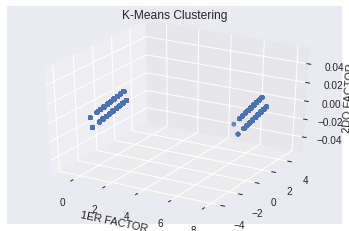

In [ ]:
#Visualización de grupos de usuarios en 3D
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-5, 5, 11)
xline = np.linspace(0, 10, 11)
yline = np.linspace(0, 15, 11)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = principalDf[0]
xdata = principalDf[1]
#ydata = principalDf[2]
#ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.scatter3D(xdata, zdata);
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
#ax.set_ylabel('2DO FACTOR')
ax.set_zlabel('2DO FACTOR')

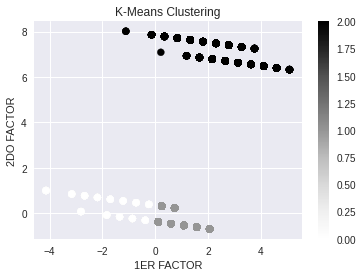

In [ ]:
#Visualización de grupos de usuarios en 2D
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)